# Stat 206B Final

- Seokjun Choi
- Mar 17-18, 2022

# Problem 1

**We use a weight gain dataset. For $n = 30$ women, weight gain during pregnancy is measured over time.**
**$y_{ij}$ represents weight gain in pounds at time in weeks $t_{ij}, j=1,...,m_i$ for subject $i, i =1,...,n$.**
**The inferential goal of interest is to explain the relationship of weight gain with time and**
**estimate a weight gain curve of a pregnant woman over time.**
**The data file *pregnency-data.csv* is separately attached.**

## Problem 1-1
**Using quantitative and graphical tools summarize the main features of this dataset.**

Let's load the dataset and make a scatterplot for each woman.

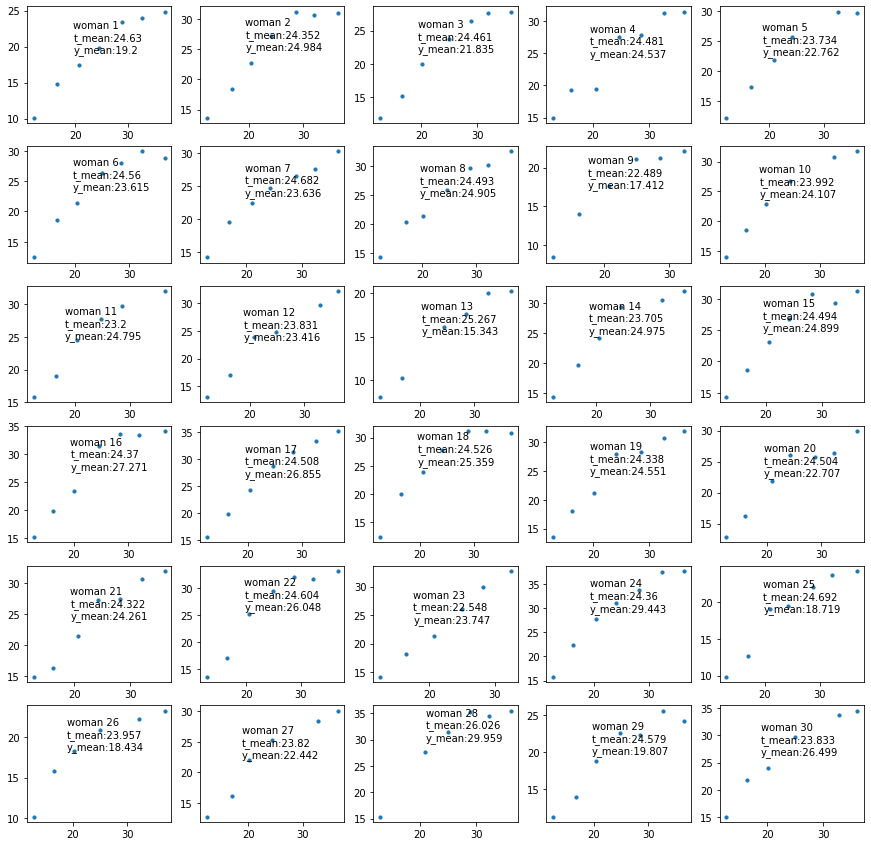

In [15]:
import csv
from statistics import mean

import matplotlib.pyplot as plt

class PregData:
    def __init__(self):
        self._load()

    def _load(self, file_path = "pregnency-data.csv"):
        self.data = []
        with open(file_path, newline='') as csvfile:
            csv_reader = csv.reader(csvfile)
            #header: "","patient","visit","time: t","weight: y"
            next(csv_reader)

            now_patient = 0
            for row in csv_reader:
                patient = int(row[1])
                time = float(row[3])
                weight = float(row[4])
                if now_patient != patient:
                    self.data.append([])
                    now_patient = patient
                self.data[-1].append((time, weight))
    
    def get_num_patient(self):
        return len(self.data)

    def get_num_total(self):
        return sum([len(patient_data) for patient_data in self.data])

    def _index_checker(self, i):
        if i==0 or i > self.get_num_patient():
            raise IndexError("index should be between 1 and " + str(self.get_num_patient()))

    def get_data_ith_patient(self, i):
        #start with 1!!
        self._index_checker(i)
        #(time: t, weight: y)
        return self.data[i-1]
    
    def get_visit_times_ith_patient(self, i):
        self._index_checker(i)
        return len(self.data[i-1])


pregdata_inst = PregData()
plt.figure(figsize=(15,15))
for i in range(pregdata_inst.get_num_patient()):
    data_ty_tuples = pregdata_inst.get_data_ith_patient(i+1)
    data_time = [t for (t,y) in data_ty_tuples]
    data_weight_gain = [y for (t,y) in data_ty_tuples]
    
    plt.subplot(6, 5, i+1)
    plt.scatter(data_time, data_weight_gain, s=10)
    plt.text(mean(data_time)-5, mean(data_weight_gain), 
        "woman "+str(i+1)+"\nt_mean:"+str(round(mean(data_time),3))+"\ny_mean:"+str(round(mean(data_weight_gain),3)))

plt.show()

For each scatterplot, the horizontal axis is for the 'time' variable, and the vertical axis is for the 'weight gain' variable.
Additionally, some numerical summaries are attached on the plots.

The number of points for each woman is different (either 6 or 7 points).
We can find that there is positive relationship between time and weight-gain for all women.
But for some women, the relationship does not seem to be linear.


## Problem 1-2

**Consider the following model,**

$y_{ij} | \beta_{0i}, \beta_1, \beta_2, \sigma^2 \sim N(\frac{\beta_{0i}}{1+\beta_1 e^{\beta_2 t_{ij}}}, \sigma^2)$

**independently, where $i=1,...,n, j=1,...,m_i$.**

**Assume that**

- $\beta_{0i} | \bar{\beta}_0, \tau^2 \sim N(\bar{\beta}_0, \tau^2), i=1,...,n$, iid
- $\beta_p | \bar{\beta}_p, u_p^2 \sim N(\bar{\beta}_p, u_p^2), p=1,2$, iid for each $p$
- $\sigma^2 | a_\sigma, b_\sigma \sim IG(a_\sigma, b_\sigma)$

**and let**

- $\bar{\beta}_0 | \mu, \nu^2 \sim N(\mu, \nu^2)$
- $\tau^2 | a_\tau, b_\tau \sim IG(a_\tau, b_\tau)$

**where $\bar{\beta}_1, \bar{\beta}_2, u_1^2, u_2^2, a_\sigma, b_\sigma, \mu, \nu^2, a_\tau, b_\tau$ are fixed.**


### problem 1-2-(a).
**Write down the joint posterior distribution of all random model parameters up to a proportionality constant.**

Following the hierarchy, our joint posterior is proportional to

$\pi(\beta_{0i}, \beta_1, \beta_2, \sigma^2, \bar{\beta}_0, \tau^2 | t, y)$

$\propto (\prod_{i=1}^n \prod_{j=1}^{m_i} f(t_{ij}, y_{ij}|\beta_{0i}, \beta_1, \beta_2, \sigma^2)) (\prod_{i=1}^n \pi(\beta_{0i}|\bar{\beta}_0, \tau^2)) \pi(\bar{\beta}_0) \pi(\tau^2) \pi(\beta_1) \pi(\beta_2) \pi(\sigma^2)$ 

$\propto (\prod_{i=1}^n \prod_{j=1}^{m_i} (2\pi\sigma^2)^{-1/2} e^{-\frac{1}{2\sigma^2} (y_{ij} - \frac{\beta_{0i}}{1+\beta_1 e^{\beta_2 t_{ij}}})^2}) (\prod_{i=1}^n (2\pi\tau^2)^{-1/2} e^{-\frac{1}{2\tau^2}(\beta_{0i} - \bar{\beta}_0)^2}) \\ \quad e^{-\frac{1}{2\nu^2}(\bar{\beta}_0 - \mu)^2} (\tau^2)^{-a_\tau-1} e^{-\frac{b_\tau}{\tau^2}} e^{-\frac{1}{2u_1^2} (\beta_1 - \bar{\beta}_1)^2} e^{-\frac{1}{2u_2^2} (\beta_2-\bar{\beta}_2)^2} (\sigma^2)^{-a_\sigma-1} e^{-\frac{b_\sigma}{\sigma^2}}$

$\propto (\sigma^2)^{-N/2} e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n \sum_{j=1}^{m_i} (y_{ij} - \frac{\beta_{0i}}{1+\beta_1 e^{\beta_2 t_{ij}}})^2} (\tau^2)^{-n/2} e^{-\frac{1}{2\tau^2} \sum_{i=1}^n (\beta_{0i}-\bar{\beta}_0)^2} \\ \quad e^{-\frac{1}{2\nu^2}(\bar{\beta}_0 - \mu)^2} (\tau^2)^{-a_\tau-1} e^{-\frac{b_\tau}{\tau^2}} e^{-\frac{1}{2u_1^2} (\beta_1 - \bar{\beta}_1)^2} e^{-\frac{1}{2u_2^2} (\beta_2-\bar{\beta}_2)^2} (\sigma^2)^{-a_\sigma-1} e^{-\frac{b_\sigma}{\sigma^2}} $

$\propto (\sigma^2)^{-N/2 -a_\sigma-1} (\tau^2)^{-n/2 -a_\tau-1} \\ \quad exp{(-\frac{1}{2\sigma^2} \sum_{i=1}^n \sum_{j=1}^{m_i} (y_{ij} - \frac{\beta_{0i}}{1+\beta_1 e^{\beta_2 t_{ij}}})^2  -\frac{1}{2\tau^2} \sum_{i=1}^n (\beta_{0i}-\bar{\beta}_0)^2 -\frac{1}{2\nu^2}(\bar{\beta}_0 - \mu)^2 -\frac{b_\tau}{\tau^2} -\frac{1}{2u_1^2} (\beta_1 - \bar{\beta}_1)^2 -\frac{1}{2u_2^2} (\beta_2-\bar{\beta}_2)^2 -\frac{b_\sigma}{\sigma^2})} $

### problem 1-2-(b).
**Describe a Markov chain Monte Carlo (MCMC) algorithm in details for posterior computation for the model.**
**Provide the full conditionals needed for your algorithm.**


I will use MH-within-Gibbs algorithm.
Under the (fixed) hyperparameter values $\bar{\beta}_1, \bar{\beta}_2, u_1^2, u_2^2, a_\sigma, b_\sigma, \mu, \nu^2, a_\tau, b_\tau$,

1. Set initial value  ${\beta_{0i}}^{(0)}, {\beta_1}^{(0)}, {\beta_2}^{(0)}, {\sigma^2}^{(0)}, {\bar{\beta}_0}^{(0)}, {\tau^2}^{(0)}$
2. For $b=1,...,B$ do
    - Draw $\beta_{0i}^{(b)}$ from $\pi(\beta_{0i} | \beta_{0(-i)}^{(b-1)}, {\beta_1}^{(b-1)}, {\beta_2}^{(b-1)}, {\sigma^2}^{(b-1)}, {\bar{\beta}_0}^{(b-1)}, {\tau^2}^{(b-1)} )$, $i=1,...30$.
    - Draw $\beta_1^{(b)}$ from $\pi(\beta_1 | \beta_{0i}^{(b)}, {\beta_2}^{(b-1)}, {\sigma^2}^{(b-1)}, {\bar{\beta}_0}^{(b-1)}, {\tau^2}^{(b-1)} )$
    - Draw $\beta_2^{(b)}$ from $\pi(\beta_2 | \beta_{0i}^{(b)}, {\beta_1}^{(b)}, {\sigma^2}^{(b-1)}, {\bar{\beta}_0}^{(b-1)}, {\tau^2}^{(b-1)} )$
    - Draw ${\sigma^2}^{(b)}$ from $\pi(\sigma^2 | \beta_{0i}^{(b)}, {\beta_1}^{(b)} {\beta_2}^{(b)}, {\bar{\beta}_0}^{(b-1)}, {\tau^2}^{(b-1)} )$
    - Draw ${\bar{\beta}_0}^{(b)}$ from $\pi(\bar{\beta}_0 | \beta_{0i}^{(b)}, {\beta_1}^{(b)} {\beta_2}^{(b)}, {\sigma^2}^{(b)}, {\tau^2}^{(b-1)} )$
    - Draw ${\tau^2}^{(b)}$ from $\pi(\beta_1 | \beta_{0i}^{(b)}, {\beta_1}^{(b)} {\beta_2}^{(b)}, {\sigma^2}^{(b)}, {\bar{\beta}_0}^{(b)} )$
    - Keep ${\beta_{0i}}^{(b)}, {\beta_1}^{(b)}, {\beta_2}^{(b)}, {\sigma^2}^{(b)}, {\bar{\beta}_0}^{(b)}, {\tau^2}^{(b)}$
3. Cut burn-in period. Do thinning if needed.

where

- $\beta_{0i}|- \sim N((\frac{1}{\sigma^2} \sum_{j=1}^{m_i} \frac{1}{(1+\beta_1 e^{\beta_2 t_{ij}})^2} + \frac{1}{\tau^2})^{-1} (\frac{1}{\sigma^2} \sum_{j=1}^{m_i} \frac{y_{ij}}{1+\beta_1 e^{\beta_2 t_{ij}}} + \frac{\bar{\beta}_0}{\tau^2} ), (\frac{1}{\sigma^2} \sum_{j=1}^{m_i} \frac{1}{(1+\beta_1 e^{\beta_2 t_{ij}})^2} + \frac{1}{\tau^2})^{-1})$ for $i=1,...,30$

- $log \pi(\beta_1|-) \propto -\frac{1}{2\sigma^2} (\sum_{i=1}^{n} \sum_{j=1}^{m_i} \frac{\beta_{0i}^2}{(1+\beta_1 e^{\beta_2 t_{ij}})^2} - \frac{2 y_{ij}\beta_{0i}}{1+\beta_1 e^{\beta_2 t_{ij}}}) - \frac{1}{2u_1^2}(\beta_1^2 - 2\beta_1 \bar{\beta}_1)  $

- $log \pi(\beta_2|-) \propto -\frac{1}{2\sigma^2} (\sum_{i=1}^{n} \sum_{j=1}^{m_i} \frac{\beta_{0i}^2}{(1+\beta_1 e^{\beta_2 t_{ij}})^2} - \frac{2 y_{ij}\beta_{0i}}{1+\beta_1 e^{\beta_2 t_{ij}}}) - \frac{1}{2u_2^2}(\beta_2^2 - 2\beta_2 \bar{\beta}_2)  $

- $\bar{\beta_0}|- \sim N((\frac{n}{\tau^2} + \frac{1}{\nu^2})^{-1} (\frac{1}{\tau^2} \sum_{i=1}^n \beta_{0i} + \frac{\mu}{\nu^2}), (\frac{n}{\tau^2} + \frac{1}{\nu^2})^{-1})$

- $\sigma^2 | - \sim IG(a_\sigma + \frac{N}{2}, b_\sigma + \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^{m_i} (y_{ij}-\frac{\beta_{0i}}{1+\beta_1 e^{\beta_2 t_{ij}}})^2 )$

- $\tau^2 | - \sim IG(a_\tau + \frac{n}{2}, b_\tau + \frac{1}{2}\sum_{i=1}^n (\beta_{0i} - \bar{\beta}_0)^2 ) $

Since full-conditional distributions for $\beta_1$ and $\beta_2$ seem unfamiliar, I will use the MH algorithm to draw them.

### Problem 1-2-(c)

**Specify values of the fixed hyperparameters and justify your choices.**

Because I have no prior-information, I will try to set vague priors for all parameters.
It will help our model to be fitted to given observations as much as possible.

For normal distribution's location parameters, I will put 0. 
For normal distribution's scale parameters, I will set them to 100.
For inverse gamma distribution's scale and rate parameters, I will use 0.1.

To sum up,
$\mu = 0, \nu^2 = 100, a_\tau = 0.1, b_\tau = 0.1, \bar{\beta}_1 = 0, u_1^2 = 100, \bar{\beta}_2 = 0, u_2^2 = 100, a_\sigma = 0.1$, and $b_\sigma = 0.1$.


### Problem 1-2-(d) & (e)

**Implement your algorithm in (b) and run MCMC simulations.**
**Assess mixing and convergence of your Markov chain.**
**Provide evidence that there is no poor mixing or approximate convergence is reached.**

**Report a summary of the posterior inference on all random parameters such as their point estimates and interval estimates.**
**Provide relevant figures and/or tables.**
**Provide a brief interpretation of your results in layman’s terms and discuss.**


*implementation information:*
- *MCMC_Gibbs_Core.py* has (almost) abstract class for gibbs sampler.
- *MCMC_MH_Core.py* has two classes: pure-MH-MCMC algorithm implementation and diagnosis tool.
- *final_gibbs_run.py* has specific codes for this model. It depends on the two *~_Core.py* files.
*Note that the first two files are almost the same for two files that I offered at HW4. I updated a little bit, though.*

I ran 300,000 iterations.
It took about 13-min on my 3-year-old inter i5 chip notebook for 300,000 iterations.
The chain converges so fast! But $\beta_1, \beta_2$ have quite strong autocorrelation.
At the below code block, I will cut first 10,000 samples (only 1/30 :D) as a burn-in period and pick one sample out of 30 (super-severe(?) thinning!!).

Here, I report some selected results (*Python stand-alone script: final_diagnosis.py*) using already generated and saved MCMC samples.
*part1.csv* includes $\beta_1, \beta_2, \sigma^2, \bar{\beta}_0$, and $\tau^2$, and *part2.csv* has $\beta_{0i}s, i=1,...,30$.(They are almost 180 mega-bytes!)
They were simultaneously generated but saved separately.
You can generate these csv file by running *final_gibbs_run.py*

To begin with, let's check traceplots, autocorrelation plots, and ESS for $\beta_1, \beta_2, \sigma^2, \bar{\beta}_0$, and $\tau^2$.
Each y-axis shows its variable name.

(If you want stand-alone python file for the below works, see *final_diagnosis.py*.)

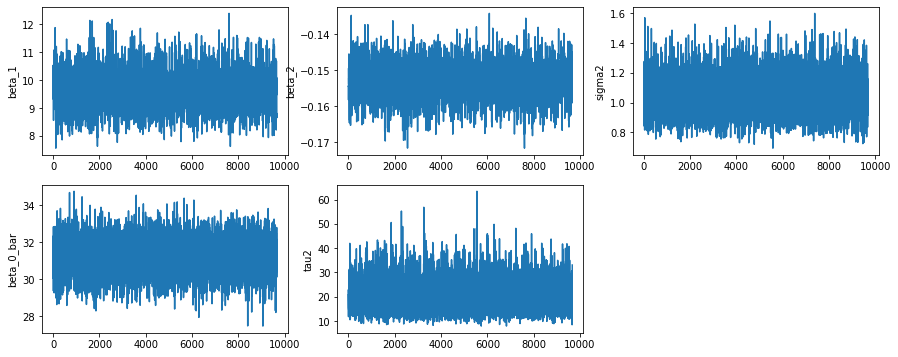

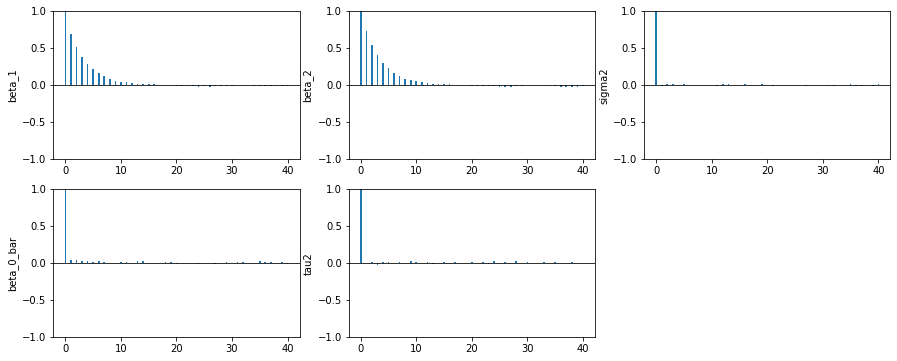

ESS - beta1 1249.1704298225739
ESS - beta2 1203.3933169740785
ESS - sigma2 3364.9187181858656
ESS - beta_0_bar 2934.010197125095
ESS - tau2 3226.843474668519


In [2]:
from bayesian_tools.MCMC_MH_Core import MCMC_Diag

gibbs_p5_diag_inst1_part1 = MCMC_Diag()
gibbs_p5_diag_inst1_part1.set_mc_sample_from_csv("part1")
gibbs_p5_diag_inst1_part1.burnin(10000)
gibbs_p5_diag_inst1_part1.thinning(30)
gibbs_p5_diag_inst1_part1.set_variable_names(["beta_1", "beta_2", "sigma2", "beta_0_bar", "tau2"])

gibbs_p5_diag_inst1_part1.show_traceplot((2,3))
gibbs_p5_diag_inst1_part1.show_acf(40, (2,3))

print("ESS - beta1", gibbs_p5_diag_inst1_part1.effective_sample_size(0)) #beta1
print("ESS - beta2", gibbs_p5_diag_inst1_part1.effective_sample_size(1)) #beta2
print("ESS - sigma2", gibbs_p5_diag_inst1_part1.effective_sample_size(2)) #sigma2
print("ESS - beta_0_bar", gibbs_p5_diag_inst1_part1.effective_sample_size(3)) #beta_0_bar
print("ESS - tau2", gibbs_p5_diag_inst1_part1.effective_sample_size(4)) #tau2

After thinning, I kept about 10000 samples.
All traceplots seem good.

Even if I thinned a lot of samples out, $\beta_1$ and $\beta_2$ still have quite a strong autocorrelation until the 10th lag.
But they decrease exponentially (or, at least quadratically), so we can conclude that their shapes are not too bad.

ESSs are not much high (in particular, $\beta_1$, and $\beta_2$), but I think the numbers are big enough to conduct posterior inference.


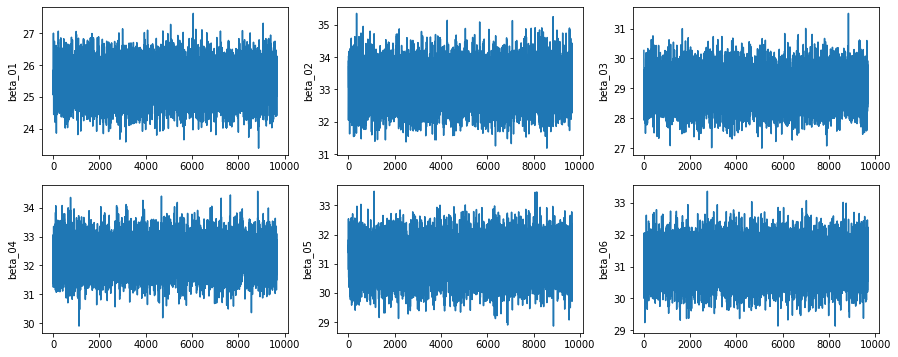

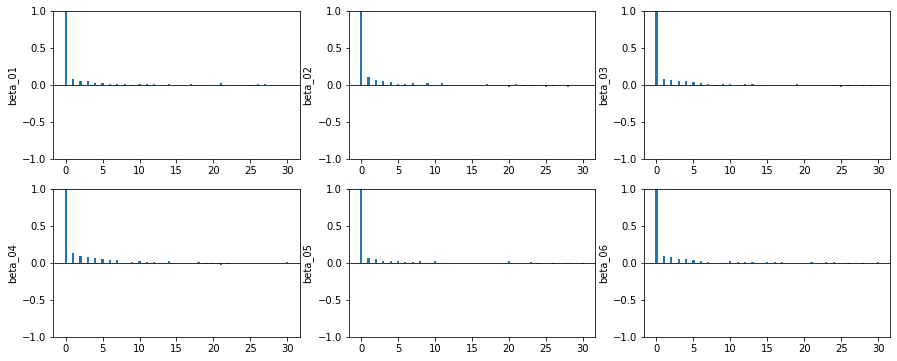

ESS - beta_01 2678.0866779064318
ESS - beta_02 2835.154487292967
ESS - beta_03 2850.1835117198593
ESS - beta_04 2460.287989145951
ESS - beta_05 2952.6693229085618
ESS - beta_06 2608.615863113506


In [3]:
gibbs_p5_diag_inst1_part2 = MCMC_Diag()
gibbs_p5_diag_inst1_part2.set_mc_sample_from_csv("part2")
gibbs_p5_diag_inst1_part2.burnin(10000)
gibbs_p5_diag_inst1_part2.thinning(30)
gibbs_p5_diag_inst1_part2.set_variable_names(["beta_0"+str(i) for i in range(1,31)])

gibbs_p5_diag_inst1_part2.show_traceplot((2,3), choose_dims=[0,1,2,3,4,5])
gibbs_p5_diag_inst1_part2.show_acf(30, (2,3), choose_dims=[0,1,2,3,4,5])

print("ESS - beta_01", gibbs_p5_diag_inst1_part2.effective_sample_size(0))
print("ESS - beta_02", gibbs_p5_diag_inst1_part2.effective_sample_size(1))
print("ESS - beta_03", gibbs_p5_diag_inst1_part2.effective_sample_size(2))
print("ESS - beta_04", gibbs_p5_diag_inst1_part2.effective_sample_size(3))
print("ESS - beta_05", gibbs_p5_diag_inst1_part2.effective_sample_size(4)) 
print("ESS - beta_06", gibbs_p5_diag_inst1_part2.effective_sample_size(5)) 

For $\beta_{0i}$, there are 30 women, so we have 30 variables, $\beta_{0,1},...,\beta_{0,30}$. 
But I think they are too much to report. Instead, let me report the first six i's only.

I cannot find any mixing issues. Traceplots and ACF plots are all good.

To sum up, I think mixing is quite well done in our MCMC chain.

Next, let's do posterior inference. Here are histograms of the above variables and quantitative summaries.

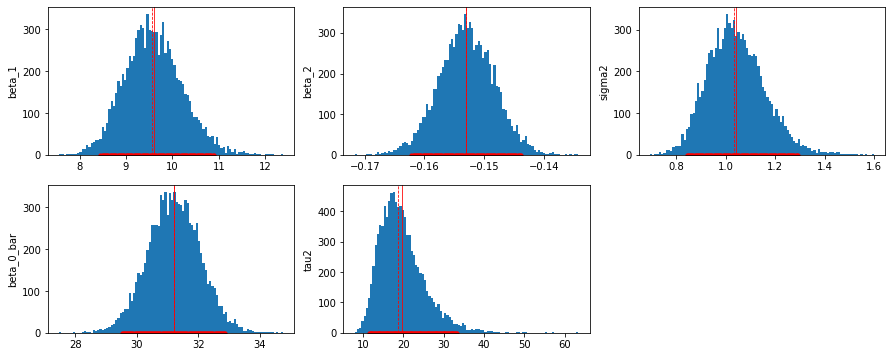

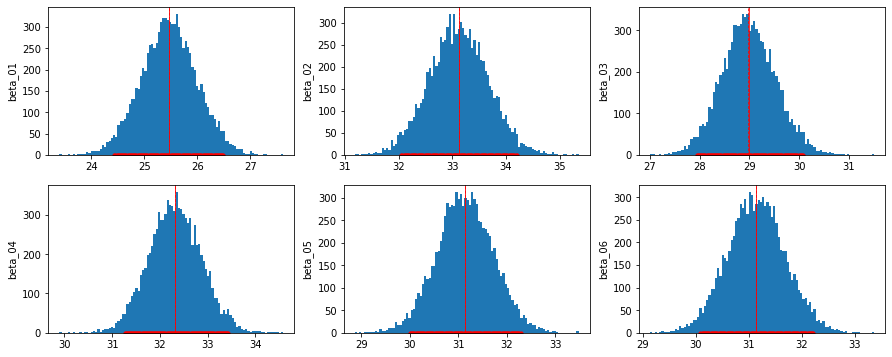

In [4]:
gibbs_p5_diag_inst1_part1.show_hist((2,3))
gibbs_p5_diag_inst1_part2.show_hist((2,3), choose_dims=[0,1,2,3,4,5])

On a histogram, red vertical-solid line indicates sample mean, and red vertical-dashed line marks sample median.
Not only that, near the horizontal axis, red horizontal-solid line is for 95% credible interval.

In [7]:
gibbs_p5_diag_inst1_part1.print_summaries(round=2)

param 		 mean 	 var 	 95%CI
beta_1 		 9.59 	 0.39 	 [8.45, 10.89]
beta_2 		 -0.15 	 0.0 	 [-0.16, -0.14]
sigma2 		 1.04 	 0.01 	 [0.84, 1.29]
beta_0_bar 		 31.21 	 0.73 	 [29.52, 32.87]
tau2 		 19.66 	 31.65 	 [11.42, 33.29]


In [8]:
gibbs_p5_diag_inst1_part2.print_summaries(round=2)

param 		 mean 	 var 	 95%CI
beta_01 		 25.47 	 0.27 	 [24.43, 26.49]
beta_02 		 33.12 	 0.3 	 [32.05, 34.2]
beta_03 		 28.99 	 0.29 	 [27.94, 30.08]
beta_04 		 32.32 	 0.3 	 [31.27, 33.43]
beta_05 		 31.14 	 0.34 	 [30.0, 32.29]
beta_06 		 31.14 	 0.3 	 [30.08, 32.21]
beta_07 		 30.78 	 0.29 	 [29.73, 31.85]
beta_08 		 32.8 	 0.3 	 [31.73, 33.89]
beta_09 		 24.36 	 0.35 	 [23.18, 25.54]
beta_010 		 32.71 	 0.35 	 [31.57, 33.88]
beta_011 		 33.81 	 0.37 	 [32.65, 35.05]
beta_012 		 31.94 	 0.35 	 [30.79, 33.08]
beta_013 		 20.35 	 0.3 	 [19.28, 21.43]
beta_014 		 33.89 	 0.36 	 [32.73, 35.1]
beta_015 		 32.78 	 0.29 	 [31.73, 33.86]
beta_016 		 36.19 	 0.32 	 [35.1, 37.31]
beta_017 		 35.45 	 0.31 	 [34.37, 36.58]
beta_018 		 33.52 	 0.3 	 [32.44, 34.61]
beta_019 		 32.69 	 0.3 	 [31.6, 33.8]
beta_020 		 29.99 	 0.29 	 [28.96, 31.07]
beta_021 		 32.21 	 0.3 	 [31.15, 33.29]
beta_022 		 34.52 	 0.3 	 [33.45, 35.61]
beta_023 		 32.91 	 0.38 	 [31.7, 34.12]
beta_024 		 38.98 	 0.32 	 [37.8

(There is a printing problem. I tried to control the width of blanks for strings automatically... but it seems that I failed. 
It seems that python's 'print' function does not work consistently with 'tab, \t' when it meets strings with different lengths. hmm...
After final exam, when I have more enough time, I'll have to find another way...)

Anyway, above output shows mean, variance, and 95% credible interval for each variable.
For each row, the order is 'variable name, mean, variance, and 95% CI.'

Let's try to interpret these values. Let me pick the first woman as a representative example.
In our model, the closest component to observations is

$y_{ij} | \beta_{0i}, \beta_1, \beta_2, \sigma^2 \sim N(\frac{\beta_{0i}}{1+\beta_1 exp{\beta_2 t_{ij}}}, \sigma^2)$

When $i=1$, we can get
$y_{1j} | \beta_{01}, \beta_1, \beta_2, \sigma^2$
$\sim N(\frac{\beta_{01}}{1+\beta_1 e^{\beta_2 t_{1j}}}, \sigma^2)$

or

$y_{1j} | \beta_{01}, \beta_1, \beta_2, \sigma^2 \sim N(\frac{25.47}{1 + 9.59 e^{-0.15 t_{1j}}}, 1.04)$

if we use sample mean values as our point estimates. 
Although direct interpretation for each fitted value is hard because of the complex logistic-function expression, we can say that there is positive relation between t and y.
For example, if time $t$ increases 1 unit, then on average, weight gain $y$ will increase 2.7522 unit in the case of the first woman.

We can interpret the result for the other woman similarly.

Every $\beta_{0i}$ are dependent through higher hierarchical structure, $\bar{\beta}_0$, and $\tau^2$.
Note that our model was $\beta_{0i} | \bar{\beta}_0, \tau^2 \sim N(\bar{\beta}_0, \tau^2), i=1,...,n$, iid
The fitted mean values of $\bar{\beta}_0$ and $\tau^2$ are $31.21$ and $19.66$, respectively.
Every $\beta_{0i}$ value can be regarded as a result generated by the $N(31.21, 19.66)$, so every woman's fitted value for weight-gain are related. 
In other words, the model used information from not only the women's observation but also other women's time and weight gain value to fit each women's coefficients.

It is also worth to remark that our model was

- $\sigma^2 | a_\sigma, b_\sigma \sim IG(a_\sigma, b_\sigma)$
- $\beta_p | \bar{\beta}_p, u_p^2 \sim N(\bar{\beta}_p, u_p^2), p=1,2$, iid for each $p$.

As you can see, $\sigma^2, \beta_1$, and $\beta_2$ are shared for all women.
If we can believe that some aspects of all women must be similar, it is a reasonable modeling.
I think it is justifiable, cause they are all human, not alien!

### Problem 1-2-(f)

**Compute a posterior predictive distribution of weight gain for subject 1 at each of the time points, $t_{ij}$.**
**Compare the posterior predictive distributions to the actual observed values of the woman,**
**and evaluate the fit of the model to the data.**
**Provide relevant figures and/or tables to support you findings.**

I will draw samples of the the first woman's predictive posterior distribution at each observed time value, using the posterior samples.
Following our model,

$y_{1j} | \beta_{01}, \beta_1, \beta_2, \sigma^2 \sim N(\frac{\beta_{01}}{1+\beta_1 e^{\beta_2 t_{1j}}}, \sigma^2)$

run a algorithm such that 

1. pick a posterior sample
2. draw $y_{1j}$ from $N(\frac{\beta_{01}}{1+\beta_1 e^{\beta_2 t_{1j}}}, \sigma^2)$ at the posterior sample values

I will repeat this algorithm at seven time values observed for the first woman, $t_{1,1},...,t_{1,7}$, 
For each repetition, I select once for each posterior sample generated by (b).


Here are code blocks and results.

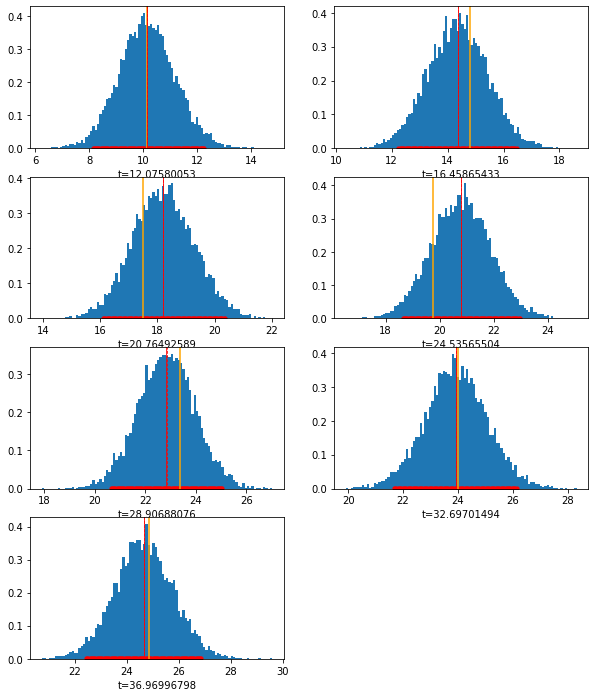

Woman 1
obs_t 	 obs_y 	 mean 	 var 	 95%CI
12.08 	 10.13 	 10.15 	 1.103 	 [8.1306, 12.2549]
16.46 	 14.81 	 14.36 	 1.15 	 [12.2418, 16.4698]
20.76 	 17.49 	 18.2 	 1.173 	 [16.0991, 20.3543]
24.54 	 19.74 	 20.79 	 1.229 	 [18.6298, 22.9692]
28.91 	 23.37 	 22.84 	 1.252 	 [20.6482, 25.0417]
32.7 	 24.0 	 23.93 	 1.285 	 [21.6688, 26.1423]
36.97 	 24.85 	 24.66 	 1.275 	 [22.4454, 26.8755]


In [6]:
from random import normalvariate, seed
from statistics import mean, median, variance
from math import exp

import matplotlib.pyplot as plt
import numpy as np

seed(20220317)

def posterior_predictive_sampler(patient_idx, obs_t, sample_vec_part1, sample_vec_part2):
    beta_0i = sample_vec_part2[patient_idx-1]
    beta_1 = sample_vec_part1[0]
    beta_2 = sample_vec_part1[1]
    sigma2 = sample_vec_part1[2]

    normal_mean = beta_0i / (1 + beta_1 * exp(beta_2 * obs_t))
    normal_sd = sigma2 ** 0.5
    return normalvariate(normal_mean, normal_sd)

obs_t_for_patient1 = [12.07580053, 16.45865433, 20.76492589, 24.53565504, 28.90688076, 32.69701494, 36.96996798]
obs_y_for_patient1 = [10.1272364, 14.80821655, 17.49366352, 19.7437975, 23.36854628, 24.00171721, 24.8546289]

# generate posterior predictive samples
posterior_predictive_samples_for_each_t = []
for t in obs_t_for_patient1:
    posterior_predictive_samples_for_each_t.append([])
    for part1, part2 in zip(gibbs_p5_diag_inst1_part1.MC_sample, gibbs_p5_diag_inst1_part2.MC_sample):
        posterior_predictive_samples_for_each_t[-1].append(posterior_predictive_sampler(1, t, part1, part2))

# histogram
grid_row = 4
grid_column= 2
plt.figure(figsize=(5*grid_column, 3*grid_row))
for i, pred_samples in enumerate(posterior_predictive_samples_for_each_t):
    plt.subplot(grid_row, grid_column, i+1)
    plt.hist(pred_samples, bins=100, density=True)
    plt.xlabel("t="+str(obs_t_for_patient1[i]))
    plt.axvline(obs_y_for_patient1[i], color="orange", linestyle="solid", linewidth=1.5)
    plt.axvline(mean(pred_samples), color="red", linestyle="solid", linewidth=0.8)
    plt.axvline(median(pred_samples), color="red", linestyle="dashed", linewidth=0.8)
    quantile_0_95 = np.quantile(pred_samples, [0.025, 0.975])
    x_axis_pts = np.linspace(quantile_0_95[0], quantile_0_95[1], num=100)
    y_axis_pts = np.zeros(len(x_axis_pts)) + 0.001
    plt.scatter(x_axis_pts, y_axis_pts, color="red", s=10, zorder=2)
plt.show()

print("Woman 1")
print("obs_t \t obs_y \t mean \t var \t 95%CI")
for i, pred_samples in enumerate(posterior_predictive_samples_for_each_t):
    cal_mean = round(mean(pred_samples),2)
    cal_var = round(variance(pred_samples),3)
    quantile_0_95 = [round(x,4) for x in np.quantile(pred_samples, [0.025, 0.975])]
    print(round(obs_t_for_patient1[i], 2),"\t", 
        round(obs_y_for_patient1[i], 2),"\t", cal_mean,"\t", cal_var,"\t", quantile_0_95)

On each histograms, the orange line indicates the observed $y_{1j}$ value.
And as above, the vertical red solid line shows mean, the vertical red dashed line reveals median, and horizontal red line near x-axis is 95% credible interval.
Below table summarize by numbers.

For every case, true observed value is within the posterior predictive distribution's 95% credible interval.
Interestingly, the 1st, 2nd, 6th and 7th cases, posterior predictive distribution's mean and median values are quite close to observed values.

In conclusion, I think we can say that the model fitting was great.